### D Vamsidhar 24070149005
## Lab - 1 Machine Vision

In [1]:
import cv2

In [2]:
# Open default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('D:/output.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    # Write the frame to the output file
    out.write(frame)

    # Display the captured frame
    cv2.imshow('Camera', frame)

    #  Press 'Q' tp exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

## Object Detection from a saved image

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

results = model.predict("Cat and Dog.jpg")

result = results[0]

print("No. of objects detected : ",len(result.boxes))

box = result.boxes[0]

print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:01<00:00, 35.7MB/s]



image 1/1 C:\Users\cl501_29\Desktop\Vamsidhar\MV\Cat and Dog.jpg: 448x640 1 cat, 1 dog, 471.8ms
Speed: 0.0ms preprocess, 471.8ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
No. of objects detected :  2
Object type: tensor([15.])
Coordinates: tensor([[171.1785, 189.1081, 341.4290, 348.6215]])
Probability: tensor([0.9469])


In [5]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(15.)
Coordinates: tensor([171.1785, 189.1081, 341.4290, 348.6215])
Probability: tensor(0.9469)


In [6]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 15.0
Coordinates: [171.17845153808594, 189.10806274414062, 341.428955078125, 348.6214599609375]
Probability: 0.9469283223152161


In [7]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: cat
Coordinates: [171, 189, 341, 349]
Probability: 0.95
---
Object type: dog
Coordinates: [322, 101, 476, 339]
Probability: 0.94
---


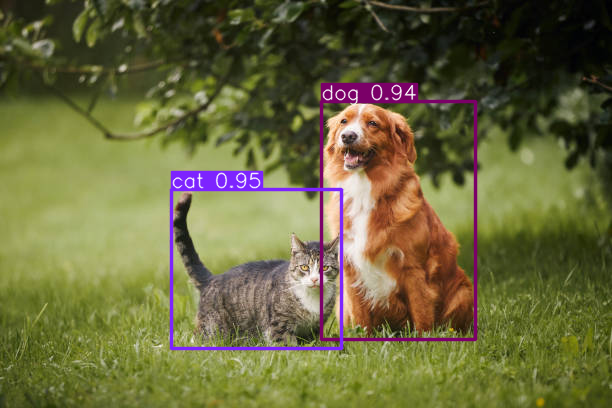

In [8]:
result = results[0]

from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])